In [3]:
import pandas as pd
from scripts import tt
from scripts import kb
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#kb_ = kb.get_kb_accuracy()
#kb__ = kb.get_kb_impact_accuracy()
#tt.training_testing_accuracy()

In [4]:
import matplotlib.pyplot as plt

def bar_plot(title, labels, training_means):

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    bar = ax.bar(x, training_means, width, label='Testing')
    y_pos = range(len(labels))
    plt.xticks(y_pos, labels, rotation=90)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    fig.tight_layout()
    #plt.savefig(your_path + title + "-all.pdf", bbox_inches='tight')
    #plt.ylim(0,55)
    #plt.savefig(your_path + title + "-ylim.pdf", bbox_inches='tight')

    plt.show()

In [5]:
data = pd.read_csv("../results/prediction_accuracy.csv")
data


,dataset,technique,rmse
0,acustic,IQR,0.140949
1,acustic,ISO,0.061785
2,acustic,PERC,0.029374
3,acustic,STD,0.069393
4,acustic,ZSB,0.131240
5,acustic,KNN,0.383810
6,acustic,LOF,0.172969
7,cancer,IQR,0.169253
8,cancer,ISO,0.036651
9,cancer,PERC,0.011883


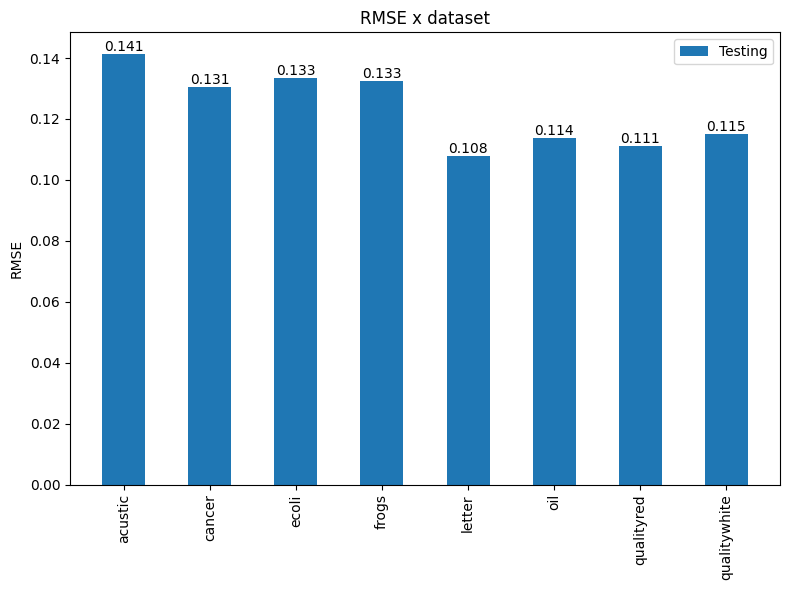

In [4]:
### performance per dataset
df = data[['dataset','rmse']].groupby(['dataset']).mean().reset_index().copy()
bar_plot("RMSE x dataset",df.dataset.unique(),df.rmse)

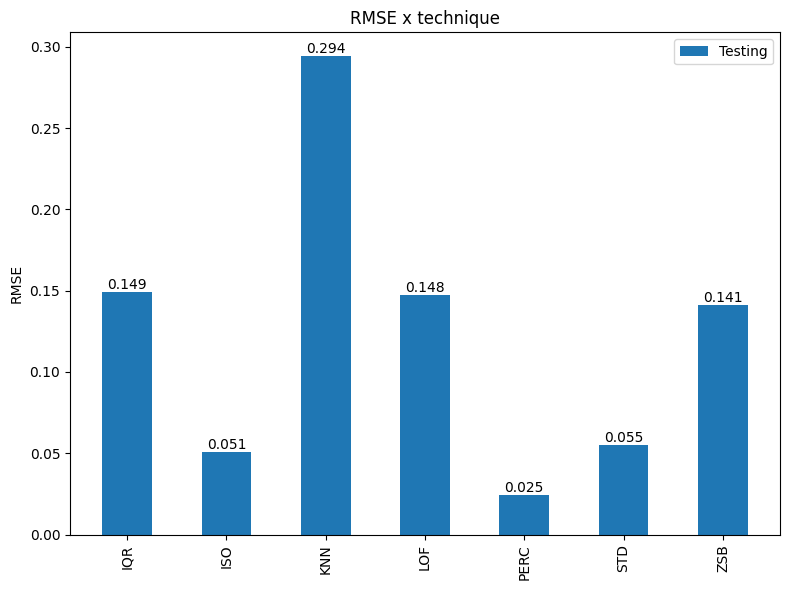

In [5]:
### performance per tecnica
df = data[['technique','rmse']].groupby(['technique']).mean().reset_index().copy()
bar_plot("RMSE x technique",df.technique.unique(),df.rmse)

In [6]:
len(data[data.rmse < 0.10])/len(data)

0.48214285714285715

In [7]:
len(data[data.rmse < 0.15])/len(data)

0.6607142857142857

In [8]:
len(data[data.rmse < 0.20])/len(data)

0.8392857142857143

In [9]:
len(data[data.rmse < 0.30])/len(data)

0.9464285714285714

In [10]:
data.rmse.mean()

np.float64(0.12318565796549229)

In [11]:
data.rmse.median()

np.float64(0.11824655452270891)